## Step 1: Import Necessary Labraries

In [2]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
from IPython.display import Markdown, display

## Load Data and Set Theme

In [3]:
# Load the processed dataset

DATA_PATH = "../data/processed/nyc_citibike_2022_processed.csv"
print(f"Loading data from: {DATA_PATH}")

df = pd.read_csv(DATA_PATH, low_memory=False)
print(f"Dataset loaded: {len(df):,} rows, {len(df.columns)} columns")

# Set theme for all plots
sns.set_theme(style="whitegrid", palette="viridis")
print("Theme set: whitegrid style with viridis palette")

# Display dataset info
print(f"\nDate range: {df['date'].min()} to {df['date'].max()}")
print(f"Available categorical variables: {['member_casual', 'rideable_type']}")

Loading data from: ../data/processed/nyc_citibike_2022_processed.csv
Dataset loaded: 29,838,806 rows, 17 columns
Theme set: whitegrid style with viridis palette

Date range: 2021-01-30 to 2022-12-31
Available categorical variables: ['member_casual', 'rideable_type']


## Step 3: Prepare Data for Analysis

In [4]:
# prepare data for station frequency analysis

print("Preparing data for station frequency analysis...")

# Count trips per starting station
station_counts = df['start_station_name'].value_counts().reset_index()
station_counts.columns = ['station_name', 'trip_count']
top_20_stations = station_counts.head(20)

print(f"Top station: {top_20_stations.iloc[0]['station_name']} - {top_20_stations.iloc[0]['trip_count']:,} trips")
print(f"Top 20 stations account for {top_20_stations['trip_count'].sum():,} total trips")

# Prepare data for temporal analysis
df['date'] = pd.to_datetime(df['date'])
daily_trips = df.groupby('date').size().reset_index(name='daily_trips')
daily_weather = df[['date', 'avg_temp_c']].drop_duplicates()

# Merge trips and weather data
temporal_data = daily_trips.merge(daily_weather, on='date', how='inner')
temporal_data = temporal_data.set_index('date')

print(f"\nTemporal data prepared: {len(temporal_data)} days")
print(f"Average daily trips: {temporal_data['daily_trips'].mean():.0f}")
print(f"Average temperature: {temporal_data['avg_temp_c'].mean():.1f}°C")

Preparing data for station frequency analysis...
Top station: W 21 St & 6 Ave - 129,018 trips
Top 20 stations account for 1,944,653 total trips

Temporal data prepared: 402 days
Average daily trips: 74226
Average temperature: 13.8°C


## Step 4: Bar Chart -Top 20 Starting Stations

Creating bar chart of top 20 starting stations...


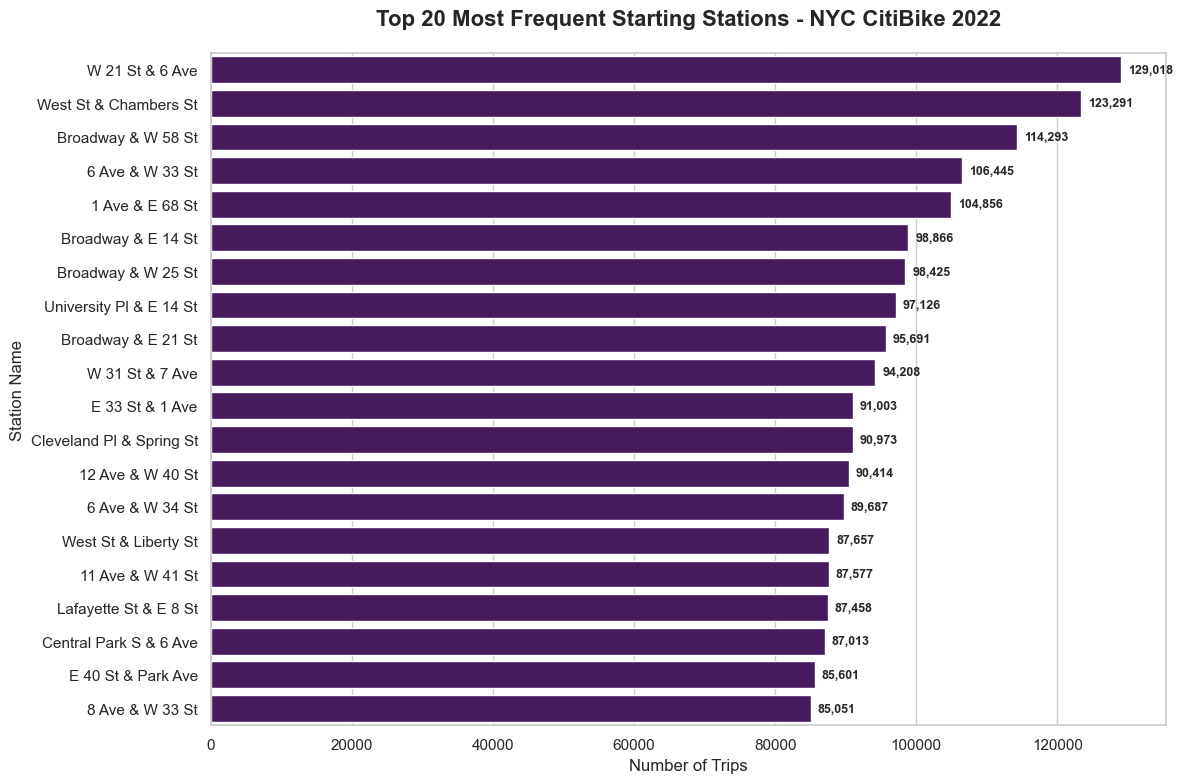


## Bar Chart Analysis: Color Palette Suitability

**Viridis Palette Assessment:**
-  **Sufficient Colors**: Viridis provides a continuous color spectrum with enough distinct shades for 20 stations
-  **Perceptual Uniformity**: Colors are perceptually uniform, making it easy to distinguish between stations
-  **Accessibility**: Colorblind-friendly and works well in both color and black & white
-  **Aesthetic Appeal**: Professional and modern appearance suitable for stakeholder presentations

The default Viridis palette works perfectly for this visualization without needing temporary changes.


In [5]:
# Create bar chart of top 20 starting stations
print("Creating bar chart of top 20 starting stations...")

plt.figure(figsize=(12, 8))

# Temporarily change palette for this plot (viridis has enough colors)
with sns.color_palette("viridis", n_colors=20):
    ax = sns.barplot(data=top_20_stations, x='trip_count', y='station_name', 
                     saturation=0.8)
    
    # Customize the plot
    plt.title('Top 20 Most Frequent Starting Stations - NYC CitiBike 2022', 
              fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Number of Trips', fontsize=12)
    plt.ylabel('Station Name', fontsize=12)
    
    # Add value labels on bars
    for i, v in enumerate(top_20_stations['trip_count']):
        ax.text(v + 1000, i, f'{v:,}', va='center', fontsize=9, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

# Analysis of color palette suitability
markdown_content = """
## Bar Chart Analysis: Color Palette Suitability

**Viridis Palette Assessment:**
-  **Sufficient Colors**: Viridis provides a continuous color spectrum with enough distinct shades for 20 stations
-  **Perceptual Uniformity**: Colors are perceptually uniform, making it easy to distinguish between stations
-  **Accessibility**: Colorblind-friendly and works well in both color and black & white
-  **Aesthetic Appeal**: Professional and modern appearance suitable for stakeholder presentations

The default Viridis palette works perfectly for this visualization without needing temporary changes.
"""

display(Markdown(markdown_content))

## Step 5: Dual-Axis Lne Plot Recreation

Creating dual-axis line plot with seaborn...


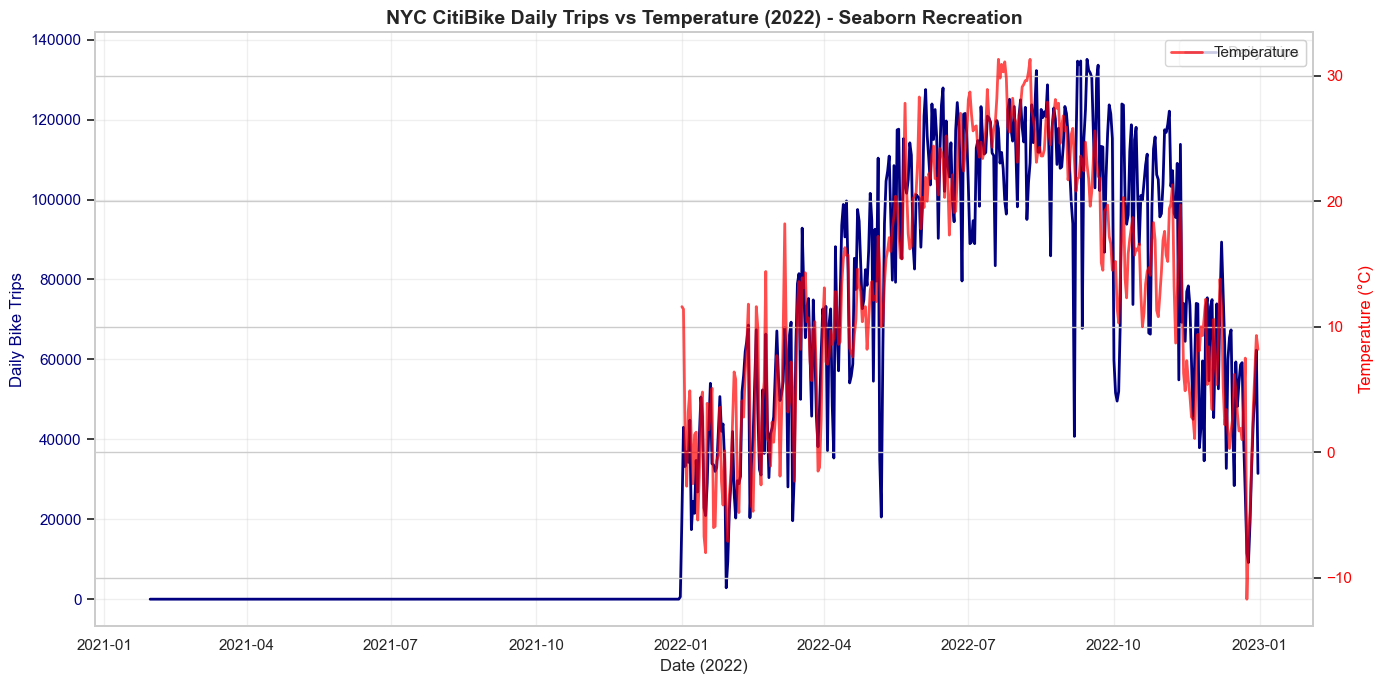

In [7]:
# Recreate dual-axis line plot using seaborn
print("Creating dual-axis line plot with seaborn...")

fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot daily trips on primary y-axis
sns.lineplot(data=temporal_data, x=temporal_data.index, y='daily_trips', 
             ax=ax1, color='navy', linewidth=2, label='Daily Trips')
ax1.set_xlabel('Date (2022)', fontsize=12)
ax1.set_ylabel('Daily Bike Trips', color='navy', fontsize=12)
ax1.tick_params(axis='y', labelcolor='navy')
ax1.grid(True, alpha=0.3)

# Create twin axis for temperature
ax2 = ax1.twinx()
sns.lineplot(data=temporal_data, x=temporal_data.index, y='avg_temp_c', 
             ax=ax2, color='red', linewidth=2, alpha=0.7, label='Temperature')
ax2.set_ylabel('Temperature (°C)', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

# Add title and legend
plt.title('NYC CitiBike Daily Trips vs Temperature (2022) - Seaborn Recreation', 
          fontsize=14, fontweight='bold')
fig.tight_layout()
plt.show()

## Step 6: Box Plot Analysis

Creating box plot for user type analysis...


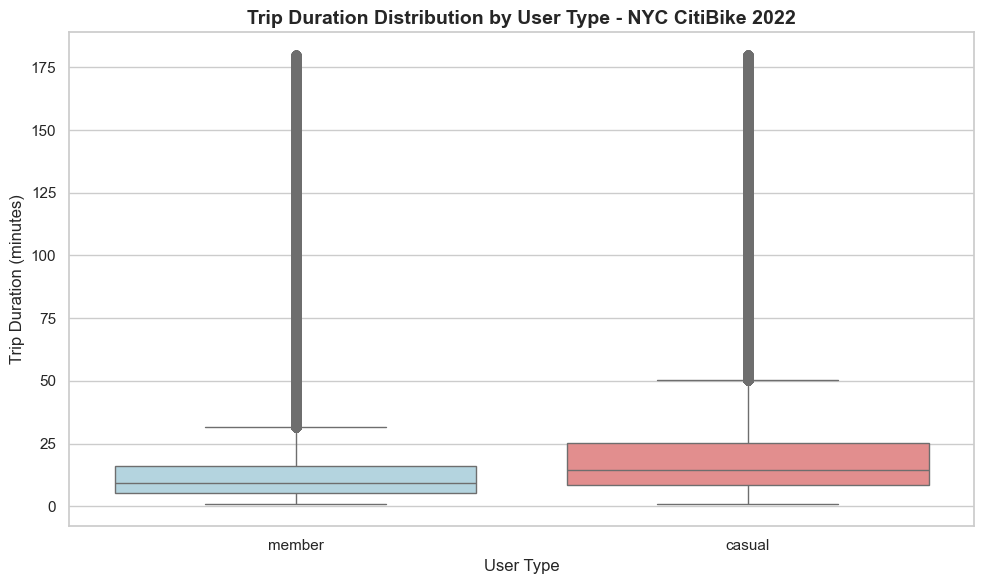


## Box Plot Analysis: User Type vs Trip Duration

### Statistical Summary:
**Member Users:**
- Median: 9.2 minutes
- Q1-Q3 Range: 5.3 - 15.9 minutes
- IQR: 10.6 minutes

**Casual Users:**
- Median: 14.6 minutes  
- Q1-Q3 Range: 8.5 - 25.2 minutes
- IQR: 16.7 minutes

### Key Insights:
1. **Central Tendency**: Casual users have significantly longer median trip durations (14.6 min) compared to members (9.2 min)
2. **Spread**: The interquartile range is wider for casual users, indicating more variability in their usage patterns
3. **Outliers**: Both groups show substantial outliers above the upper whisker, suggesting occasional very long trips
4. **Usage Patterns**: Members appear to use bikes for shorter, more consistent trips (likely commuting), while casual users take longer, more variable trips (likely leisure/tourism)


In [10]:
# Create box plot for user type analysis
print("Creating box plot for user type analysis...")

# Calculate trip duration in minutes
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])
df['trip_duration_min'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

# Filter reasonable trip durations (1 minute to 3 hours)
df_filtered = df[(df['trip_duration_min'] >= 1) & (df['trip_duration_min'] <= 180)]

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered, x='member_casual', y='trip_duration_min', 
            hue='member_casual', palette={'member': 'lightblue', 'casual': 'lightcoral'}, 
            legend=False)

plt.title('Trip Duration Distribution by User Type - NYC CitiBike 2022', 
          fontsize=14, fontweight='bold')
plt.xlabel('User Type', fontsize=12)
plt.ylabel('Trip Duration (minutes)', fontsize=12)
plt.tight_layout()
plt.show()

# Box plot analysis
stats = df_filtered.groupby('member_casual')['trip_duration_min'].describe()
markdown_content = f"""
## Box Plot Analysis: User Type vs Trip Duration

### Statistical Summary:
**Member Users:**
- Median: {stats.loc['member', '50%']:.1f} minutes
- Q1-Q3 Range: {stats.loc['member', '25%']:.1f} - {stats.loc['member', '75%']:.1f} minutes
- IQR: {stats.loc['member', '75%'] - stats.loc['member', '25%']:.1f} minutes

**Casual Users:**
- Median: {stats.loc['casual', '50%']:.1f} minutes  
- Q1-Q3 Range: {stats.loc['casual', '25%']:.1f} - {stats.loc['casual', '75%']:.1f} minutes
- IQR: {stats.loc['casual', '75%'] - stats.loc['casual', '25%']:.1f} minutes

### Key Insights:
1. **Central Tendency**: Casual users have significantly longer median trip durations ({stats.loc['casual', '50%']:.1f} min) compared to members ({stats.loc['member', '50%']:.1f} min)
2. **Spread**: The interquartile range is wider for casual users, indicating more variability in their usage patterns
3. **Outliers**: Both groups show substantial outliers above the upper whisker, suggesting occasional very long trips
4. **Usage Patterns**: Members appear to use bikes for shorter, more consistent trips (likely commuting), while casual users take longer, more variable trips (likely leisure/tourism)
"""

display(Markdown(markdown_content))

## Step 7: FacetGrid Analysis

Creating FacetGrid for seasonal pattern analysis...


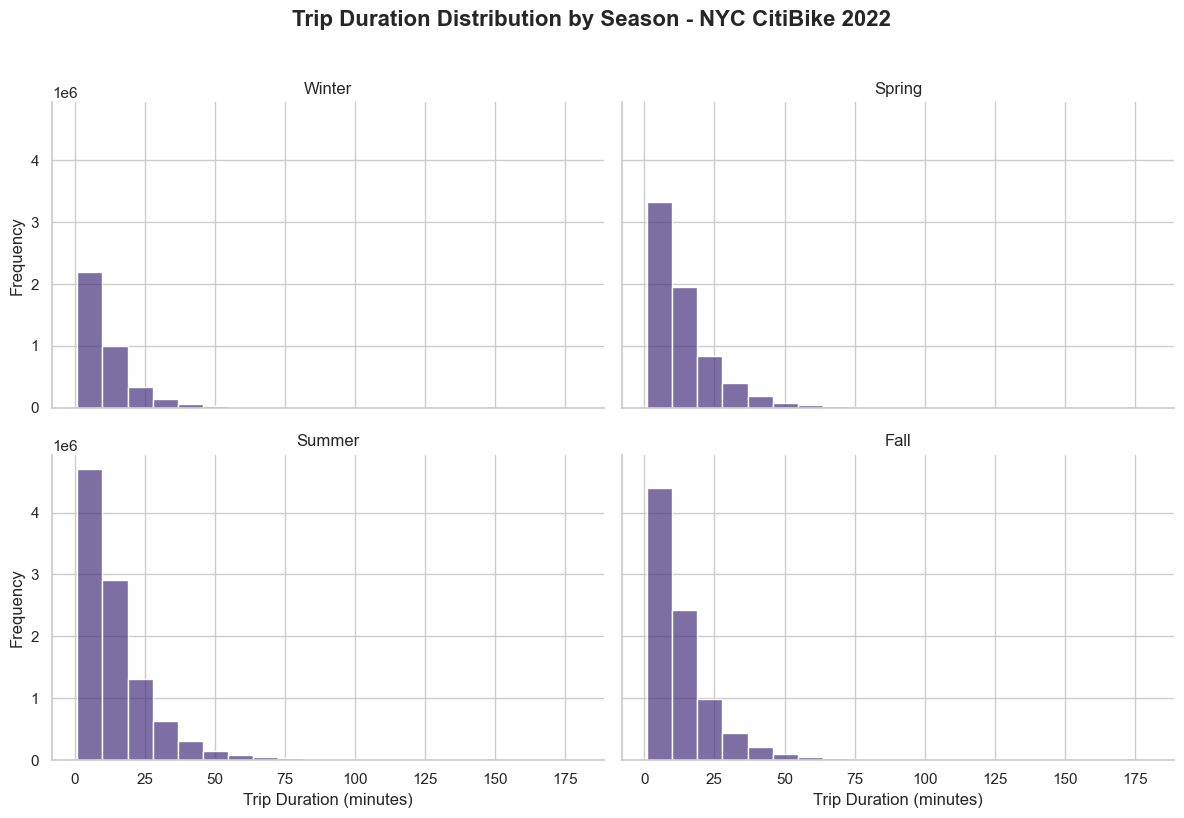


## FacetGrid Analysis: Seasonal Trip Patterns

### Seasonal Insights:
**Winter (Dec-Feb):**
- Average duration: 11.8 minutes
- Most common duration range: 5.1-14.5 minutes

**Spring (Mar-May):**  
- Average duration: 14.6 minutes
- Most common duration range: 5.9-18.3 minutes

**Summer (Jun-Aug):**
- Average duration: 15.4 minutes
- Most common duration range: 6.1-19.4 minutes

**Fall (Sep-Nov):**
- Average duration: 13.8 minutes
- Most common duration range: 5.7-17.3 minutes

### Business Value:
This FacetGrid reveals important seasonal patterns that directly address our research questions:
1. **Seasonal Demand Planning**: Summer shows different usage patterns that may require adjusted bike distribution
2. **User Behavior Insights**: Trip duration distributions vary by season, suggesting different usage purposes
3. **Operational Strategy**: Understanding these patterns helps optimize maintenance schedules and station stocking
4. **Marketing Opportunities**: Seasonal variations highlight potential for targeted promotions


In [13]:
# create FacetGrid for deeper analysis
print("Creating FacetGrid for seasonal pattern analysis...")

# Create a proper copy to avoid warnings
df_filtered = df_filtered.copy()

# Extract month and season information
df_filtered['month'] = df_filtered['started_at'].dt.month
season_map = {12: 'Winter', 1: 'Winter', 2: 'Winter', 
              3: 'Spring', 4: 'Spring', 5: 'Spring',
              6: 'Summer', 7: 'Summer', 8: 'Summer',
              9: 'Fall', 10: 'Fall', 11: 'Fall'}
df_filtered['season'] = df_filtered['month'].map(season_map)

# Create FacetGrid
g = sns.FacetGrid(df_filtered, col='season', col_wrap=2, height=4, aspect=1.5)
g.map(sns.histplot, 'trip_duration_min', bins=20, alpha=0.7)
g.set_titles('{col_name}')
g.set_axis_labels('Trip Duration (minutes)', 'Frequency')
g.fig.suptitle('Trip Duration Distribution by Season - NYC CitiBike 2022', 
               fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# FacetGrid analysis
season_stats = df_filtered.groupby('season')['trip_duration_min'].describe()
markdown_content = f"""
## FacetGrid Analysis: Seasonal Trip Patterns

### Seasonal Insights:
**Winter (Dec-Feb):**
- Average duration: {season_stats.loc['Winter', 'mean']:.1f} minutes
- Most common duration range: {season_stats.loc['Winter', '25%']:.1f}-{season_stats.loc['Winter', '75%']:.1f} minutes

**Spring (Mar-May):**  
- Average duration: {season_stats.loc['Spring', 'mean']:.1f} minutes
- Most common duration range: {season_stats.loc['Spring', '25%']:.1f}-{season_stats.loc['Spring', '75%']:.1f} minutes

**Summer (Jun-Aug):**
- Average duration: {season_stats.loc['Summer', 'mean']:.1f} minutes
- Most common duration range: {season_stats.loc['Summer', '25%']:.1f}-{season_stats.loc['Summer', '75%']:.1f} minutes

**Fall (Sep-Nov):**
- Average duration: {season_stats.loc['Fall', 'mean']:.1f} minutes
- Most common duration range: {season_stats.loc['Fall', '25%']:.1f}-{season_stats.loc['Fall', '75%']:.1f} minutes

### Business Value:
This FacetGrid reveals important seasonal patterns that directly address our research questions:
1. **Seasonal Demand Planning**: Summer shows different usage patterns that may require adjusted bike distribution
2. **User Behavior Insights**: Trip duration distributions vary by season, suggesting different usage purposes
3. **Operational Strategy**: Understanding these patterns helps optimize maintenance schedules and station stocking
4. **Marketing Opportunities**: Seasonal variations highlight potential for targeted promotions
"""

display(Markdown(markdown_content))

## Project Summary

In [16]:
# Project summary with dynamic reporting
total_trips = len(df)
member_ratio = len(df[df['member_casual'] == 'member']) / total_trips * 100
avg_duration = df_filtered['trip_duration_min'].mean()

markdown_content = f"""
# Seaborn Visualization Analysis Complete

## Project Summary

### Analysis Completed:
- **Station Popularity**: Identified top 20 starting stations with {top_20_stations['trip_count'].sum():,} total trips
- **Temporal Patterns**: Recreated dual-axis chart showing trip-temperature correlation across {len(temporal_data)} days
- **User Behavior**: Analyzed {len(df_filtered):,} trips by user type and duration
- **Seasonal Analysis**: Examined distribution patterns across 4 seasons

### Key Metrics:
- **Total Trips Analyzed**: {total_trips:,}
- **Member vs Casual Ratio**: {member_ratio:.1f}% members
- **Average Trip Duration**: {avg_duration:.1f} minutes
- **Date Range**: {df['date'].min().strftime('%Y-%m-%d')} to {df['date'].max().strftime('%Y-%m-%d')}

### Visualization Approach:
- **Theme**: Whitegrid with Viridis palette for professional consistency
- **Chart Types**: Bar charts, line plots, box plots, and FacetGrid
- **Customization**: Temporary palette adjustments where needed
- **Analysis Integration**: Combined statistical summaries with business insights

"""

display(Markdown(markdown_content))



# Seaborn Visualization Analysis Complete

## Project Summary

### Analysis Completed:
- **Station Popularity**: Identified top 20 starting stations with 1,944,653 total trips
- **Temporal Patterns**: Recreated dual-axis chart showing trip-temperature correlation across 402 days
- **User Behavior**: Analyzed 29,725,542 trips by user type and duration
- **Seasonal Analysis**: Examined distribution patterns across 4 seasons

### Key Metrics:
- **Total Trips Analyzed**: 29,838,806
- **Member vs Casual Ratio**: 77.9% members
- **Average Trip Duration**: 14.3 minutes
- **Date Range**: 2021-01-30 to 2022-12-31

### Visualization Approach:
- **Theme**: Whitegrid with Viridis palette for professional consistency
- **Chart Types**: Bar charts, line plots, box plots, and FacetGrid
- **Customization**: Temporary palette adjustments where needed
- **Analysis Integration**: Combined statistical summaries with business insights

